In [144]:
# Importación de librerías
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings ('ignore')
import matplotlib.pyplot as pyplot
import seaborn as sns

In [145]:
# Generación de DataFrame
data = pd.read_csv ('learningSet.csv')

In [146]:
# Dimesión del DataFrame
data.shape

(95412, 481)

In [147]:
data ['TARGET_B'].value_counts ()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [148]:
data ['TARGET_D'].max ()

200.0

In [149]:
data.describe ()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
count,95412.000000,95412.000000,95412.000000,71747.000000,12386.000000,74126.000000,50680.000000,95412.000000,42558.000000,42558.000000,...,95412.000000,85439.000000,85439.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95280.000000
mean,9141.363256,54.223117,2723.602933,61.611649,1.527773,3.886248,5.345699,3.321438,0.152075,0.059166,...,9135.651648,9151.022917,8.093739,13.347786,95778.176959,0.050759,0.793073,0.500618,1.910053,31.533711
std,343.454752,953.844476,2132.241295,16.664199,0.806861,1.854960,2.742490,9.306899,0.470023,0.262078,...,320.394019,294.257260,8.213242,10.769997,55284.596094,0.219506,4.429725,0.500002,1.072749,18.764614
min,8306.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,7211.000000,0.000000,1.285714,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,8801.000000,0.000000,201.000000,48.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,...,8810.000000,8903.000000,4.000000,8.384615,47910.750000,0.000000,0.000000,0.000000,1.000000,15.000000
50%,9201.000000,1.000000,2610.000000,62.000000,1.000000,4.000000,6.000000,0.000000,0.000000,0.000000,...,9201.000000,9204.000000,6.000000,11.636364,95681.500000,0.000000,0.000000,1.000000,2.000000,32.000000
75%,9501.000000,2.000000,4601.000000,75.000000,2.000000,5.000000,8.000000,3.000000,0.000000,0.000000,...,9409.000000,9409.000000,11.000000,15.477955,143643.500000,0.000000,0.000000,1.000000,3.000000,49.000000
max,9701.000000,72002.000000,9710.000000,98.000000,7.000000,7.000000,9.000000,241.000000,6.000000,4.000000,...,9603.000000,9702.000000,1088.000000,1000.000000,191779.000000,1.000000,200.000000,1.000000,4.000000,62.000000


In [150]:
# Checking nulls percent per column
nulls_percent_df = pd.DataFrame(data.isna().sum()/len(data))
nulls_percent_df= nulls_percent_df.reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df.sort_values(by='nulls_percentage', ascending = False)

,column_name,nulls_percentage
414,RDATE_5,0.999906
436,RAMNT_5,0.999906
412,RDATE_3,0.997464
434,RAMNT_3,0.997464
413,RDATE_4,0.997055
...,...,...
168,ETHC3,0.000000
167,ETHC2,0.000000
166,ETHC1,0.000000
165,HHD12,0.000000


In [151]:
nulls_percent_df.sort_values(by='nulls_percentage', ascending = False).head (70)

,column_name,nulls_percentage
414,RDATE_5,0.999906
436,RAMNT_5,0.999906
412,RDATE_3,0.997464
434,RAMNT_3,0.997464
413,RDATE_4,0.997055
...,...,...
383,ADATE_24,0.387509
380,ADATE_21,0.369052
364,ADATE_5,0.352052
369,ADATE_10,0.343227


In [152]:
# Drop columns witg nulls_percentage > 25%
drop_columns = nulls_percent_df[nulls_percent_df['nulls_percentage']>0.25]
drop_columns.shape

(72, 2)

In [153]:
# Will do a list from drop_columns
drop_columns_list = list (drop_columns['column_name'])
print (drop_columns_list)

['NUMCHLD', 'WEALTH1', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML', 'MAGFEM', 'MAGMALE', 'PUBGARDN', 'PUBCULIN', 'PUBHLTH', 'PUBDOITY', 'PUBNEWFN', 'PUBPHOTO', 'PUBOPP', 'WEALTH2', 'ADATE_5', 'ADATE_10', 'ADATE_13', 'ADATE_15', 'ADATE_17', 'ADATE_19', 'ADATE_20', 'ADATE_21', 'ADATE_22', 'ADATE_23', 'ADATE_24', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_8', 'RDATE_9', 'RDATE_10', 'RDATE_11', 'RDATE_12', 'RDATE_13', 'RDATE_14', 'RDATE_15', 'RDATE_16', 'RDATE_17', 'RDATE_18', 'RDATE_19', 'RDATE_20', 'RDATE_21', 'RDATE_22', 'RDATE_23', 'RDATE_24', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_8', 'RAMNT_9', 'RAMNT_10', 'RAMNT_11', 'RAMNT_12', 'RAMNT_13', 'RAMNT_14', 'RAMNT_15', 'RAMNT_16', 'RAMNT_17', 'RAMNT_18', 'RAMNT_19', 'RAMNT_20', 'RAMNT_21', 'RAMNT_22', 'RAMNT_23', 'RAMNT_24']


In [154]:
# Let's suppose that wealth1 and wealth2 are not important variables.
cols = ['WEALTH1', 'WEALTH2']

for i in cols:
    drop_columns_list.remove (i)

len (drop_columns_list)

70

In [155]:
# Copia de seguridad
copia = data.copy ()

In [156]:
# Saving changes into DF "data"
data.drop (columns = drop_columns_list, inplace = True)

In [157]:
data.shape

(95412, 411)

In [158]:
data.head ()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A


In [159]:
# `MAILCODE` | Mail Code <br /> " "=Address is OK <br /> B=Bad Address
data.MAILCODE.value_counts ()

     94013
B     1399
Name: MAILCODE, dtype: int64

In [160]:
# Will change " " for "A". We are gonna make a lambda function
data['MAILCODE'] = data['MAILCODE'].apply (lambda x: x.replace(' ', 'A'))
data.MAILCODE.value_counts ()

A    94013
B     1399
Name: MAILCODE, dtype: int64

In [161]:
# Will do the same but replacing empty cells for NaN values
data = data.apply (lambda x: x.replace(' ', np.nan))

In [162]:
data.head ()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,A,NaN,3712,0,NaN,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,A,NaN,5202,0,NaN,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,A,NaN,0,0,NaN,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,A,NaN,2801,0,NaN,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,NaN,0,FL,33176,A,NaN,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A


In [163]:
# Checking nulls percent per column
nulls_percent_df = pd.DataFrame(data.isna().sum()/len(data))
nulls_percent_df= nulls_percent_df.reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df.sort_values(by='nulls_percentage', ascending = False)

,column_name,nulls_percentage
11,RECPGVG,0.998805
35,SOLP3,0.998113
37,MAJOR,0.996919
57,PLATES,0.994131
44,HOMEE,0.990703
...,...,...
163,HUR1,0.000000
162,HVP6,0.000000
161,HVP5,0.000000
160,HVP4,0.000000


In [164]:
# Drop columns with nulls_percentage > 25%
drop_columns = nulls_percent_df[nulls_percent_df['nulls_percentage']>0.25]

In [165]:
drop_columns

,column_name,nulls_percentage
6,PVASTATE,0.984719
9,RECINHSE,0.929747
10,RECP3,0.978860
11,RECPGVG,0.998805
12,RECSWEEP,0.983052
17,AGEFLAG,0.309689
19,CHILD03,0.987989
20,CHILD07,0.983587
21,CHILD12,0.981019
22,CHILD18,0.970161


In [166]:
drop_columns_list = list(drop_columns ['column_name'])
print (drop_columns_list)

['PVASTATE', 'RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP', 'AGEFLAG', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'WEALTH1', 'SOLP3', 'SOLIH', 'MAJOR', 'WEALTH2', 'GEOCODE', 'COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'PETS', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES', 'LIFESRC', 'PEPSTRFL', 'RFA_5', 'RFA_10', 'RFA_13', 'RFA_15', 'RFA_17', 'RFA_19', 'RFA_20', 'RFA_21', 'RFA_22', 'RFA_23', 'RFA_24']


In [167]:
cols = ['WEALTH1', 'WEALTH2', 'VETERANS', 'SOLIH']

for i in cols:
    drop_columns_list.remove (i)

len (drop_columns_list)

43

In [168]:
data = data.drop(drop_columns_list, axis = 1)

In [169]:
data.shape

(95412, 368)

In [170]:
data.SOLIH.value_counts ()

12    5693
0      296
1       94
2       75
3       19
4       16
6        7
Name: SOLIH, dtype: int64

In [171]:
data.SOLIH = data.SOLIH.fillna ('Default')

In [172]:
data['SOLIH'] = data['SOLIH'].apply(lambda x: x.replace('Default','13'))

In [173]:
data.VETERANS.value_counts ()

Y    10426
Name: VETERANS, dtype: int64

In [174]:
data.VETERANS = data.VETERANS.fillna ('A')

In [175]:
data['VETERANS'] = data['VETERANS'].apply(lambda x: x.replace('A','N'))

In [176]:
Y = data [['TARGET_B', 'TARGET_D']]

In [177]:
data.drop(['TARGET_B', 'TARGET_D'], axis = 1, inplace = True)

In [178]:
# Numerical Var
numerical = data.select_dtypes (np.number)
numerical.shape

(95412, 335)

In [179]:
# Categorical Var
categorical = data.select_dtypes (object)
categorical.shape

(95412, 31)

In [180]:
# Suma de valores nulos por columna.
categorical.isna().sum ()

OSOURCE       928
STATE           0
ZIP             0
MAILCODE        0
NOEXCH          7
MDMAUD          0
DOMAIN       2316
CLUSTER      2316
HOMEOWNR    22228
GENDER       2957
DATASRCE    21280
SOLIH           0
VETERANS        0
RFA_2           0
RFA_3        1950
RFA_4        2312
RFA_6        3557
RFA_7        8874
RFA_8        3511
RFA_9       11245
RFA_11      10422
RFA_12       8923
RFA_14      18867
RFA_16      20417
RFA_18      21263
RFA_2R          0
RFA_2A          0
MDMAUD_R        0
MDMAUD_F        0
MDMAUD_A        0
GEOCODE2      319
dtype: int64

In [181]:
categorical.STATE.value_counts ()
# Queremos agrupar los datos de State cuando el grupo de entradas sea inferior a 2500

CA    17343
FL     8376
TX     7535
IL     6420
MI     5654
NC     4160
WA     3577
GA     3403
IN     2980
WI     2795
MO     2712
TN     2492
AZ     2407
OR     2183
MN     2175
CO     2032
SC     1759
AL     1705
KY     1620
OK     1617
LA     1594
KS     1294
IA     1271
AR     1020
MS      986
NV      979
NM      877
NE      754
UT      569
ID      533
MT      527
HI      449
SD      301
WY      283
AK      282
ND      260
AP       81
NY       71
VA       55
OH       52
PA       38
MD       34
NJ       26
MA       25
CT       23
AA       18
AE       15
ME       11
NH        8
VT        7
RI        6
VI        5
WV        4
GU        4
DE        3
DC        1
AS        1
Name: STATE, dtype: int64

In [182]:
df = pd.DataFrame (categorical['STATE'].value_counts()).reset_index ()

In [183]:
df.columns = ['state', 'count']

In [184]:
df

,state,count
0,CA,17343
1,FL,8376
2,TX,7535
3,IL,6420
4,MI,5654
5,NC,4160
6,WA,3577
7,GA,3403
8,IN,2980
9,WI,2795


In [185]:
other = list (df[df['count']<2500] ['state'])

In [186]:
other

['TN',
 'AZ',
 'OR',
 'MN',
 'CO',
 'SC',
 'AL',
 'KY',
 'OK',
 'LA',
 'KS',
 'IA',
 'AR',
 'MS',
 'NV',
 'NM',
 'NE',
 'UT',
 'ID',
 'MT',
 'HI',
 'SD',
 'WY',
 'AK',
 'ND',
 'AP',
 'NY',
 'VA',
 'OH',
 'PA',
 'MD',
 'NJ',
 'MA',
 'CT',
 'AA',
 'AE',
 'ME',
 'NH',
 'VT',
 'RI',
 'VI',
 'WV',
 'GU',
 'DE',
 'DC',
 'AS']

In [187]:
# Mapeamos
def other_states (x):
    if x in other:
        return 'other'
    else:
        return x

In [188]:
categorical['STATE'] = list (map(other_states, categorical['STATE']))

In [189]:
categorical.STATE.value_counts ()

other    30457
CA       17343
FL        8376
TX        7535
IL        6420
MI        5654
NC        4160
WA        3577
GA        3403
IN        2980
WI        2795
MO        2712
Name: STATE, dtype: int64

## Lab | Revisiting Machine Learning Case Study

- Exclude the following variables by looking at the definitions. Create a new empty list called drop_list. 

OSOURCE - symbol definitions not provided, too many categories
ZIP CODE - we are including state already

We will append this list and then drop all the columns in this list later:

- Identify columns that over 85% missing values

- Remove those columns from the dataframe

- Reduce the number of categories in the column GENDER. The column should only have either "M" for males, "F" for females, and "other" for all the rest

In [190]:
# Creamos una lista de lo que vamos a eliminar
drop_list = []
drop_list.append ('OSOURCE')
drop_list.append ('ZIP')

In [191]:
# Visualización de lista
drop_list

['OSOURCE', 'ZIP']

In [192]:
# Dataframe con las columnas que tienen mas de 85% de null values
df = pd.DataFrame (categorical.isna().sum()/len(categorical)).reset_index().sort_values (by=[0], ascending = False)
list (df[df[0]>0.85]['index'].values)

[]

In [193]:
# sumo dos columnas a eliminar
drop_list.append('SOLIH')
drop_list.append('VETERANS')
drop_list

['OSOURCE', 'ZIP', 'SOLIH', 'VETERANS']

In [194]:
categorical = categorical.drop (columns = drop_list)

In [195]:
categorical.shape

(95412, 27)

In [196]:
# Trabajaremos sobre la columna Gender
categorical.GENDER.value_counts ()

F    51277
M    39094
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64

In [197]:
# Empezamos por trabajar con los Null values. El ejercicio pide reemplazarlo por Female (F)
categorical.GENDER.isnull ().sum ()

2957

In [198]:
categorical['GENDER'] = categorical['GENDER'].fillna ('F')

In [199]:
categorical.GENDER.isnull ().sum ()

0

In [200]:
# Le asignaremos todo lo que no sea M y F a la variable other
def clean_gender (x):
    if x not in ['F', 'M']:
        return 'other'
    else:
        return x

In [201]:
categorical['GENDER'] = list (map(clean_gender, categorical['GENDER']))
categorical.GENDER.value_counts ()

F        54234
M        39094
other     2084
Name: GENDER, dtype: int64

In [202]:
categorical.MAILCODE.value_counts ()

A    94013
B     1399
Name: MAILCODE, dtype: int64

In [203]:
categorical['NOEXCH'].unique ()

array(['0', '1', 'X', 0, 1, nan], dtype=object)

In [204]:
# Reseteamos nuevamente la columna drop_list para eliminar mas columnas
drop_list = []
drop_list.append ('MAILCODE')
drop_list.append ('NOEXCH')

In [205]:
categorical.DOMAIN.value_counts ()

R2    13623
T2    12369
S1    11503
S2     8530
C2     8264
C1     6145
C3     5280
T1     4982
R3     4809
U1     4510
U2     3254
U3     2598
T3     2176
S3     1891
U4     1804
R1     1358
Name: DOMAIN, dtype: int64

In [206]:
# Null values count
categorical.DOMAIN.isnull().sum ()

2316

In [207]:
# Primero paso los datos de U3 a U2
categorical.DOMAIN = categorical.DOMAIN.replace ('U3', 'U2')

In [208]:
# Ahora paso los datos de U4 a U3
categorical.DOMAIN = categorical.DOMAIN.replace ('U4', 'U3')

In [209]:
# Reemplazo de Null Values por R2
categorical.DOMAIN.fillna ('R2', inplace = True)

In [210]:
# Vamos a crear 2 variables para separar los dominios de el codigo 
categorical['DOMAIN_1'] = list (map (lambda x: [0], categorical.DOMAIN))
categorical['DOMAIN_2']= list (map (lambda x: [1], categorical.DOMAIN))

In [211]:
categorical.columns

Index(['STATE', 'MAILCODE', 'NOEXCH', 'MDMAUD', 'DOMAIN', 'CLUSTER',
       'HOMEOWNR', 'GENDER', 'DATASRCE', 'RFA_2', 'RFA_3', 'RFA_4', 'RFA_6',
       'RFA_7', 'RFA_8', 'RFA_9', 'RFA_11', 'RFA_12', 'RFA_14', 'RFA_16',
       'RFA_18', 'RFA_2R', 'RFA_2A', 'MDMAUD_R', 'MDMAUD_F', 'MDMAUD_A',
       'GEOCODE2', 'DOMAIN_1', 'DOMAIN_2'],
      dtype='object')

In [212]:
drop_list.append ('DOMAIN')

In [213]:
drop_list.append ('MDMAUD')

In [214]:
drop_list

['MAILCODE', 'NOEXCH', 'DOMAIN', 'MDMAUD']

In [215]:
# Eliminamos todas las columnas de drop list
categorical.drop (columns = drop_list, inplace = True)

In [216]:
categorical.columns

Index(['STATE', 'CLUSTER', 'HOMEOWNR', 'GENDER', 'DATASRCE', 'RFA_2', 'RFA_3',
       'RFA_4', 'RFA_6', 'RFA_7', 'RFA_8', 'RFA_9', 'RFA_11', 'RFA_12',
       'RFA_14', 'RFA_16', 'RFA_18', 'RFA_2R', 'RFA_2A', 'MDMAUD_R',
       'MDMAUD_F', 'MDMAUD_A', 'GEOCODE2', 'DOMAIN_1', 'DOMAIN_2'],
      dtype='object')

In [217]:
# Volvemos a crear drop_list: MDMAUD_R, MDMAUD_F, MDMAUD_A
drop_list = []
drop_list = drop_list + ['MDMAUD_R', 'MDMAUD_F', 'MDMAUD_A']

In [218]:
drop_list

['MDMAUD_R', 'MDMAUD_F', 'MDMAUD_A']

In [219]:
# Quiero añadir a la drop_list todos los RFA excepto el 2R y el 2A
for i in categorical.columns:
    if 'RFA' in i and i not in ['RFA_2R', 'RFA_2A'] :
        drop_list.append (i)

In [220]:
drop_list

['MDMAUD_R',
 'MDMAUD_F',
 'MDMAUD_A',
 'RFA_2',
 'RFA_3',
 'RFA_4',
 'RFA_6',
 'RFA_7',
 'RFA_8',
 'RFA_9',
 'RFA_11',
 'RFA_12',
 'RFA_14',
 'RFA_16',
 'RFA_18']

In [221]:
categorical.drop(columns = drop_list , inplace = True)

In [222]:
categorical.isna ().sum ()

STATE           0
CLUSTER      2316
HOMEOWNR    22228
GENDER          0
DATASRCE    21280
RFA_2R          0
RFA_2A          0
GEOCODE2      319
DOMAIN_1        0
DOMAIN_2        0
dtype: int64

In [223]:
# Source of Overlay Data <br /> Indicates which third-party data source the donor matched against 
# <br /> 1=MetroMail <br /> 2=Polk <br /> 3=Both
categorical ['DATASRCE'] = categorical ['DATASRCE'].fillna ('3')

# Geo Cluster Code indicating the level geography at which a record matches the census data. 
# A nominal or symbolic field. <br /> Blank=No code has been assigned or did not match at any level.
categorical ['GEOCODE2'] = categorical ['GEOCODE2'].fillna ('A')

# Home Owner Flag <br /> H=Home owner <br /> U=Unknown
categorical ['HOMEOWNR'] = categorical ['HOMEOWNR'].fillna ('H')

# Geo Cluster Code indicating the level geography at which a record matches the census data. 
# A nominal or symbolic field. <br /> Blank=No code has been assigned or did not match at any level.
categorical ['CLUSTER'] = categorical ['CLUSTER'].fillna ('40')

## Numerical

In [224]:
numerical.shape

(95412, 335)

In [225]:
df = pd.DataFrame(numerical.isna ().sum().reset_index())
df.columns = ['Columns_name', 'nulls']
df [df['nulls']>0]

,Columns_name,nulls
3,AGE,23665
4,INCOME,21286
5,WEALTH1,44732
14,WEALTH2,43823
135,MSA,132
136,ADI,132
137,DMA,132
302,ADATE_3,1950
303,ADATE_4,2191
304,ADATE_6,3557


In [226]:
drop_list = []
for col in numerical.columns:
    if 'ADATE' in col:
        drop_list.append (col)

drop_list.pop ()
drop_list

['ADATE_2',
 'ADATE_3',
 'ADATE_4',
 'ADATE_6',
 'ADATE_7',
 'ADATE_8',
 'ADATE_9',
 'ADATE_11',
 'ADATE_12',
 'ADATE_14',
 'ADATE_16',
 'ADATE_18']

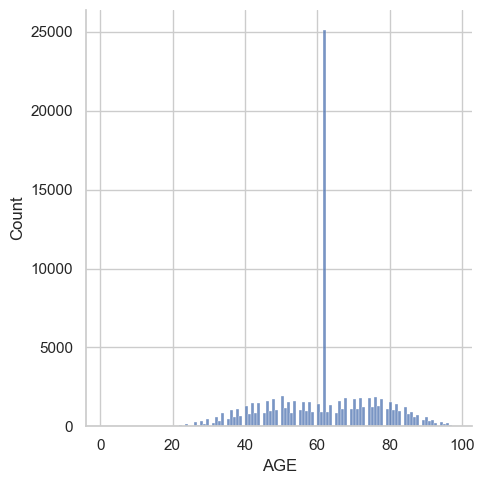

In [227]:
# Suponiendo que df_cat es tu DataFrame
sns.set(style="whitegrid")

numerical ['AGE'] = numerical ['AGE'].fillna(np.mean(numerical['AGE']))
sns.displot (numerical ['AGE'])

In [228]:
numerical.AGE.value_counts ()

61.611649    23665
50.000000     1930
76.000000     1885
72.000000     1813
68.000000     1809
             ...  
9.000000         1
6.000000         1
10.000000        1
8.000000         1
15.000000        1
Name: AGE, Length: 97, dtype: int64

In [229]:
numerical.INCOME.value_counts ()

5.0    15451
2.0    13114
4.0    12732
1.0     9022
3.0     8558
6.0     7778
7.0     7471
Name: INCOME, dtype: int64

In [230]:
numerical ['INCOME'] = numerical ['INCOME'].astype ('object')

In [231]:
numerical.INCOME.isnull ().sum ()

21286

In [232]:
numerical['INCOME'].fillna (5.0, inplace = True)

In [242]:
numerical.INCOME.value_counts

<bound method IndexOpsMixin.value_counts of 0        5.0
1        6.0
2        3.0
3        1.0
4        3.0
        ... 
95407    5.0
95408    7.0
95409    5.0
95410    7.0
95411    5.0
Name: INCOME, Length: 95412, dtype: object>

In [243]:
# Variable WEALTH1
numerical.WEALTH1.isnull().sum()

0

In [244]:
mode_value = numerical["WEALTH1"].mode()[0]
numerical["WEALTH1"].fillna(mode_value, inplace=True)

In [245]:
numerical ['WEALTH1'] = numerical ['WEALTH1'].astype(object)

In [246]:
# Hago lo mismo con WEALTH2
mode_value = numerical["WEALTH2"].mode()[0]
numerical["WEALTH2"].fillna(mode_value, inplace=True)
numerical ['WEALTH2'] = numerical ['WEALTH2'].astype(object)

In [248]:
numerical.WEALTH2.value_counts ()

9.0    50346
8.0     5975
7.0     5684
6.0     5497
5.0     5351
4.0     5074
3.0     5046
2.0     4971
1.0     4191
0.0     3277
Name: WEALTH2, dtype: int64

In [249]:
# MSA, ADI, DMA

numerical.shape

(95412, 335)

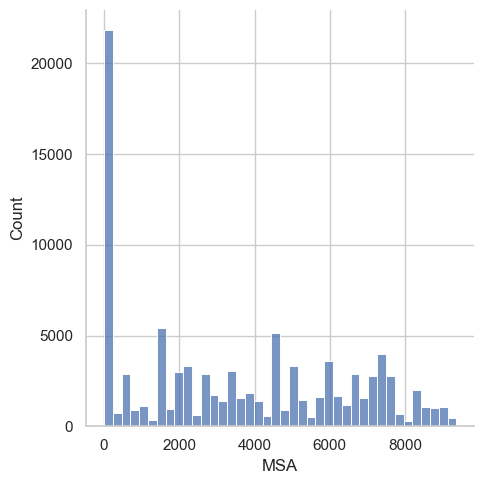

In [253]:
sns.displot (numerical [numerical ['MSA'].isna () == False]['MSA'])

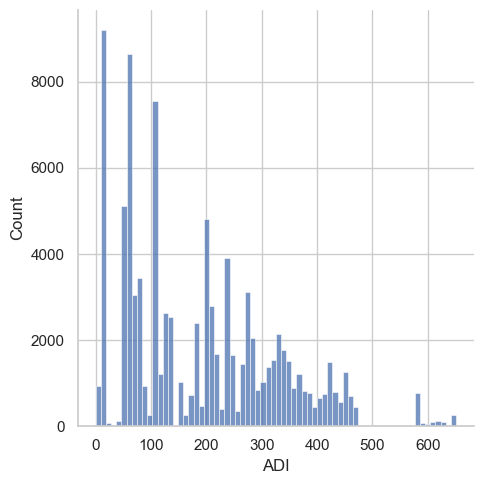

In [254]:
sns.displot (numerical [numerical ['ADI'].isna () == False]['ADI'])

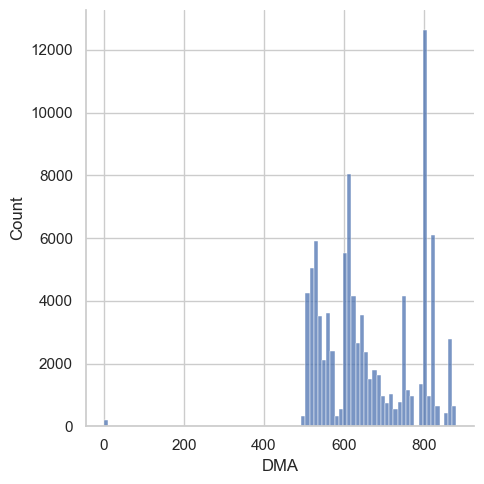

In [255]:
sns.displot (numerical [numerical ['DMA'].isna () == False]['DMA'])

# Transformaremos los valores de estas 3 variables por la media.

In [256]:
numerical ['MSA'] = numerical ['MSA'].fillna(np.mean(numerical['MSA']))
numerical ['ADI'] = numerical ['ADI'].fillna(np.mean(numerical['ADI']))
numerical ['DMA'] = numerical ['DMA'].fillna(np.mean(numerical['DMA']))

In [257]:
numerical.NEXTDATE.isnull ().sum ()

9973

In [258]:
drop_list.append ('NEXTDATE')

In [259]:
numerical.CLUSTER2.value_counts ()

13.0    3466
5.0     3154
57.0    2666
59.0    2653
15.0    2559
        ... 
30.0     647
46.0     644
29.0     569
40.0     369
6.0      211
Name: CLUSTER2, Length: 62, dtype: int64

In [262]:
# Como es una variable discreta quiero sacar la media pero redondearla al número entero próximo.
numerical ['CLUSTER2'] = numerical ['CLUSTER2'].fillna (np.ceil(np.mean(numerical['CLUSTER2'])))
numerical ['TIMELAG'] = numerical ['TIMELAG'].fillna (np.ceil(np.mean(numerical['TIMELAG'])))

In [267]:
numerical.drop(columns = drop_list, inplace = True)

In [269]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ["columns_name", "nulls"]
df[df["nulls"]>0]

,columns_name,nulls


In [270]:
numerical.shape

(95412, 322)

# LESSON 7.3

In [271]:
# Variance Threshold
from sklearn.feature_selection import VarianceThreshold

In [272]:
sel = VarianceThreshold (threshold = (.9))
sel = sel.fit (numerical)
temp = sel. transform (numerical)
temp = pd.DataFrame (temp)
print (numerical.shape)
print (temp.shape)

(95412, 322)
(95412, 312)


In [274]:
# Selecciono las varianzas superiores a 0.9
sel.variances_ > 0.9

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [279]:
removed_columns = pd.DataFrame(data=(numerical.columns, sel.variances_, sel.get_support()), index= ("column_name", "variance", "statement")).T

In [285]:
removed_columns = removed_columns.loc[(removed_columns["statement"]==False),:]

In [286]:
removed_columns

,column_name,variance,statement
28,ETH6,0.46141,False
173,TPE6,0.539863,False
174,TPE7,0.483732,False
256,ANC5,0.500561,False
257,ANC6,0.284182,False
262,ANC11,0.750543,False
266,ANC15,0.150632,False
290,HC15,0.243664,False
298,MHUC2,0.751454,False
319,HPHONE_D,0.25,False


In [287]:
drop_list = list (removed_columns.column_name)

In [288]:
drop_list

['ETH6',
 'TPE6',
 'TPE7',
 'ANC5',
 'ANC6',
 'ANC11',
 'ANC15',
 'HC15',
 'MHUC2',
 'HPHONE_D']

In [290]:
X = numerical.copy ()
y = Y ['TARGET_B']

In [293]:
#RECURSIVE FEATURE EXTRACTION
from sklearn.feature_selection import RFE
from sklearn import linear_model
lm=linear_model.LinearRegression()
rfe=RFE(lm, n_features_to_select=20, verbose=False)
rfe.fit(X,y)

df=pd.DataFrame(data=rfe.ranking, columns=['Rank'])
df['Column_name']=X.columns
df[df['Rank']==1]

AttributeError: 'RFE' object has no attribute 'ranking'